# Import necessary modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read data using pandas

In [ ]:
# Using gbk encoder which supports china characters.
df = pd.read_csv("housing_data.csv", encoding='gbk')

In [3]:
df.head()

,Unnamed: 0,url,id,Lng,Lat,Cid,tradeTime,DOM,totalPrice,square,...,kitchen,bathRoom,floor,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,subway,district
0,0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475489,40.019520,1111027376244,2016-08-09,1464.0,415.0,131.00,...,1,1,高 26,2005,3,6,0.217,1.0,1.0,7
1,1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453917,39.881534,1111027381879,2016-07-28,903.0,575.0,132.38,...,1,2,高 22,2004,4,6,0.667,1.0,0.0,7
2,2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.561978,39.877145,1111040862969,2016-12-11,1271.0,1030.0,198.00,...,1,3,中 4,2005,3,6,0.500,1.0,0.0,7
3,3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,116.438010,40.076114,1111043185817,2016-09-30,965.0,297.5,134.00,...,1,1,底 21,2008,1,6,0.273,1.0,0.0,6
4,4,https://bj.lianjia.com/chengjiao/101086920653....,101086920653,116.428392,39.886229,1111027381174,2016-08-28,927.0,392.0,81.00,...,1,1,中 6,1960,2,2,0.333,0.0,1.0,1


# shape and columns

In [4]:
df.shape

(318851, 22)

In [5]:
df.columns

Index(['Unnamed: 0', 'url', 'id', 'Lng', 'Lat', 'Cid', 'tradeTime', 'DOM',
       'totalPrice', 'square', 'livingRoom', 'drawingRoom', 'kitchen',
       'bathRoom', 'floor', 'constructionTime', 'renovationCondition',
       'buildingStructure', 'ladderRatio', 'elevator', 'subway', 'district'],
      dtype='object')

# Remove unnecessary columns

In [6]:
housing_dropped = df.drop(columns=["Cid", "id", "url", "Unnamed: 0"])

# Creating DataFrame with null values in columns

In [7]:
null_dataSeries = housing_dropped.isna().sum()
housing_null = pd.DataFrame(null_dataSeries, columns=["0"])

In [8]:
housing_null

,0
Lng,0
Lat,0
tradeTime,0
DOM,157977
totalPrice,0
square,0
livingRoom,0
drawingRoom,0
kitchen,0
bathRoom,0


#  cleaning missing values

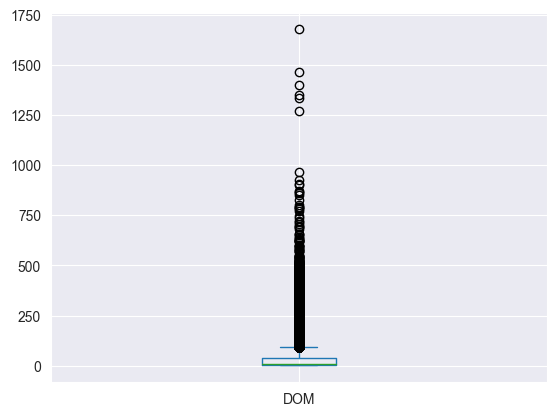

In [9]:
# Analyzing DOM column box plot
housing_dropped.DOM.plot(kind = "box");

### we have so many outliers, so we should use mode of DOM column to fill the missing values

In [10]:
# creating a copy of our dataframe
housing_no_missing = housing_dropped.copy()

In [11]:
# filling DOM missing values with its mode.
mode_value = housing_dropped["DOM"].mode()[0]
housing_no_missing["DOM"] = housing_no_missing["DOM"].fillna(mode_value)

In [12]:
mode_value

1.0

### removing rows which have missing values in elevator or subway column

In [13]:
housing_no_missing.dropna(subset=["elevator", "subway"], inplace=True)

In [14]:
housing_no_missing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 318819 entries, 0 to 318850
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Lng                  318819 non-null  float64
 1   Lat                  318819 non-null  float64
 2   tradeTime            318819 non-null  object 
 3   DOM                  318819 non-null  float64
 4   totalPrice           318819 non-null  float64
 5   square               318819 non-null  float64
 6   livingRoom           318819 non-null  object 
 7   drawingRoom          318819 non-null  object 
 8   kitchen              318819 non-null  int64  
 9   bathRoom             318819 non-null  object 
 10  floor                318819 non-null  object 
 11  constructionTime     318819 non-null  object 
 12  renovationCondition  318819 non-null  int64  
 13  buildingStructure    318819 non-null  int64  
 14  ladderRatio          318819 non-null  float64
 15  elevator             3

# Changing categorical columns from given number to string value
### NEW VALUES:
<center>
<table>
<tr>
    <td><b><code>elevator</code></b></td>
</tr>
<tr>
<td>1</td> <td>'has elevator'</td>
</tr>
<tr>
<td>0</td> <td>'no elevator'</td>
</tr>
</table>

<br>

<table>
<tr>
    <td><b><code>subway</code></b></td>
</tr>
<tr>
<td>1</td> <td>'has subway'</td>
</tr>
<tr>
<td>0</td> <td>'no subway'</td>
</tr>
</table>
<br>


<table>
<tr>
<td><b><code>buildingStructure</code></b></td>
</tr>
<tr>
<td>1</td> <td>'unknown'</td>
</tr>
<tr>
<td>2</td> <td>'mixed'</td>
</tr>

<tr>
<td>3</td> <td>'brick and wood' </td>
</tr>

<tr>
<td>4</td> <td>'concrete'</td>
</tr>

<tr>
<td>5</td> <td>'steel'</td>
</tr>

<tr>
<td>6</td> <td>'steel-concrete composite'</td>
</tr>
</table>
<br>


<table>
<tr>
<td><b><code>renovationCondition</code></b></td>
</tr>
<tr>
<td>1</td> <td>'other'</td>
</tr>
<tr>
<td>2</td> <td>'rough'</td>
</tr>

<tr>
<td>3</td> <td>'Simplicity' </td>
</tr>

<tr>
<td>4</td> <td>'hardcover'</td>
</tr>

</table>

</center>

In [20]:
# Creating a copy of current housing dataframe
housing_categorical = housing_no_missing.copy()
# elevator and subway types are float we change them to int first.
housing_categorical[["elevator", "subway"]] = housing_categorical[["elevator", "subway"]].astype(int)
# Changing type of selected columns to string (object)
housing_categorical[["elevator", "subway", "buildingStructure", "renovationCondition"]] = housing_categorical[["elevator", "subway", "buildingStructure", "renovationCondition"]].astype(str)
# Replace numeric values to string values.
housing_categorical["elevator"] = housing_categorical["elevator"].replace({'1': 'has elevator', '0': 'no elevator'})
housing_categorical["subway"] = housing_categorical["subway"].replace({'1': 'has subway', '0': 'no subway'})
housing_categorical["buildingStructure"] = housing_categorical["buildingStructure"].replace({'1': 'unknown', '2': 'mixed', '3': 'brick and wood', '4': 'concrete', '5': 'steel', '6': 'steel-concrete composite'})
housing_categorical["renovationCondition"] = housing_categorical["renovationCondition"].replace({'1': 'other', '2': 'rough', '3': 'Simplicity', '4': 'hardcover'})

In [22]:
housing_categorical[["elevator", "subway", "buildingStructure", "renovationCondition"]].head()

,elevator,subway,buildingStructure,renovationCondition
0,has elevator,has subway,steel-concrete composite,Simplicity
1,has elevator,no subway,steel-concrete composite,hardcover
2,has elevator,no subway,steel-concrete composite,Simplicity
3,has elevator,no subway,steel-concrete composite,other
4,no elevator,has subway,mixed,rough


# Some columns have numeric values but their type is 'object' we should replace them with numeric values

In [24]:
housing_categorical.info()

<class 'pandas.core.frame.DataFrame'>
Index: 318819 entries, 0 to 318850
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Lng                  318819 non-null  float64
 1   Lat                  318819 non-null  float64
 2   tradeTime            318819 non-null  object 
 3   DOM                  318819 non-null  float64
 4   totalPrice           318819 non-null  float64
 5   square               318819 non-null  float64
 6   livingRoom           318819 non-null  object 
 7   drawingRoom          318819 non-null  object 
 8   kitchen              318819 non-null  int64  
 9   bathRoom             318819 non-null  object 
 10  floor                318819 non-null  object 
 11  constructionTime     318819 non-null  object 
 12  renovationCondition  318819 non-null  object 
 13  buildingStructure    318819 non-null  object 
 14  ladderRatio          318819 non-null  float64
 15  elevator             3

### Some unique values in these columns:

In [25]:
print('constructionTime : ',housing_categorical.constructionTime.unique())
print('floor : ',housing_categorical.floor.unique())

constructionTime :  ['2005' '2004' '2008' '1960' '1997' '2009' '2006' '1991' '2001' '1990'
 '2011' '2000' '1998' '2010' '1996' '1993' '2002' '未知' '2012' '1989'
 '2003' '2007' '1994' '1984' '1992' '2014' '1985' '2013' '1999' '1979'
 '1981' '1976' '1982' '1975' '1983' '1986' '1995' '1965' '1988' '1987'
 '2015' '1955' '1980' '1978' '1958' '1970' '1956' '1977' '1964' '1963'
 '1967' '2016' '1974' '1973' '1959' '1954' '1962' '1966' '1957' '1944'
 '1972' '1971' '1953' '1968' '1961' '1950' '1952' '1933' '1969' '1906'
 '1934' '1914']
floor :  ['高 26' '高 22' '中 4' '底 21' '中 6' '中 8' '高 6' '高 10' '中 23' '底 11' '底 3'
 '高 24' '低 23' '中 19' '高 18' '低 25' '中 12' '中 14' '中 30' '中 27' '中 5'
 '低 18' '底 28' '中 11' '低 9' '顶 7' '顶 27' '低 6' '中 17' '顶 6' '中 24' '中 15'
 '底 5' '中 29' '顶 19' '顶 5' '中 9' '低 22' '顶 18' '低 16' '高 13' '高 9' '高 17'
 '底 6' '中 28' '低 26' '底 15' '高 16' '底 2' '低 7' '中 13' '低 33' '底 14' '高 15'
 '底 4' '顶 11' '中 32' '顶 16' '底 18' '顶 17' '低 14' '低 10' '底 20' '高 12'
 '低 31' '低 30' '低 19' '低

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5>
some of values in <code>constructionTime</code> column are china characters which means <code>Unknown</code> we can replace them with mean or mode but for this case we remove houses which have unknown <code>constructionTime</code>
</font>
</p>

In [38]:
housing_construction = housing_categorical.copy()
# Delete rows which have character value in this column.
housing_construction = housing_construction[housing_construction["constructionTime"].str.isdigit()]
# Change type of this column to integer.
housing_construction["constructionTime"] = housing_construction["constructionTime"].astype(int)

In [39]:
housing_construction.constructionTime.dtype

dtype('int32')

In [42]:
print(housing_construction.constructionTime.unique())

[2005 2004 2008 1960 1997 2009 2006 1991 2001 1990 2011 2000 1998 2010
 1996 1993 2002 2012 1989 2003 2007 1994 1984 1992 2014 1985 2013 1999
 1979 1981 1976 1982 1975 1983 1986 1995 1965 1988 1987 2015 1955 1980
 1978 1958 1970 1956 1977 1964 1963 1967 2016 1974 1973 1959 1954 1962
 1966 1957 1944 1972 1971 1953 1968 1961 1950 1952 1933 1969 1906 1934
 1914]
